In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ML Assignment/

/content/drive/MyDrive/ML Assignment


# Read and Preprocess Data

In [ ]:
import numpy as np
from tensorflow.keras import layers, Sequential, models

In [ ]:
import h5py
hf = h5py.File("/content/drive/MyDrive/ML Assignment/datasets2.h5", "r")

In [ ]:
X = np.array(hf["/X"]).astype("uint8")
y = np.array(hf["/y"]).astype("uint8")

In [ ]:
hf.close()

In [ ]:
X.shape
X =  X.reshape(-1, 256, 192, 1)
X.shape

(80500, 256, 192, 1)

In [ ]:
resized = models.Sequential([
      layers.experimental.preprocessing.Resizing(96, 72)
])

In [ ]:
resized_X = []
for i in range (len(X)):
  resized_X.append(resized(X[i]))

In [ ]:
resized_X = np.array(resized_X)

In [ ]:
resized_X = resized_X.reshape(-1, 96, 72)

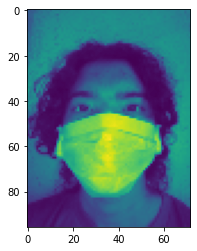

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(resized_X[0])

In [ ]:
resized_X = resized_X.reshape(-1, 96*72)

In [ ]:
from sklearn.model_selection import train_test_split
# split the dataset twice

# split into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split (resized_X, y, test_size = 0.20, random_state=1)

# from previous training set, split into 0.6 training set and 20% validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
print("X_train.shape:", format(X_train.shape))
print("X_test.shape:", format(X_test.shape))
print("X_val.shape:", format(X_val.shape))

X_train.shape: (48300, 6912)
X_test.shape: (16100, 6912)
X_val.shape: (16100, 6912)


In [ ]:
resized_X = []
X = []
import gc
gc.collect()

4

# Naive Bayes

In [ ]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

# Create Gaussian classifier
model = GaussianNB()

In [ ]:
# Train the model using the training sets
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Find out validation accuracy
model.score(X_val, y_val)

0.4367701863354037

In [ ]:
# Find out training accuracy
model.score(X_train, y_train)

0.456935817805383

# Model Evaluation

In [ ]:
# Evaluate with testing accuracy
model.score(X_test, y_test)

0.4401863354037267

In [ ]:
X_new = X_test[0:10]
y_pred_new = model.predict(X_new)
print("Predicted:{}".format(y_pred_new))
print("Actual:   {}".format(y_test[0:10]))

Predicted:[154  21 103  25  67  11  73  51  38  31]
Actual:   [115  21 102 142  67  35 104  96  38  31]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.18      0.68      0.28        92
           2       0.96      0.74      0.83        91
           3       0.20      0.44      0.28       100
           4       0.43      0.22      0.30        98
           5       0.83      0.57      0.68        93
           6       0.56      0.61      0.58       102
           7       0.79      0.55      0.65       103
           8       0.48      0.55      0.51        97
           9       0.45      0.40      0.42       108
          10       0.40      0.38      0.39       106
          11       0.23      0.38      0.29       111
          12       0.33      0.61      0.43        97
          13       0.34      0.26      0.29        98
          14       0.56      0.46      0.51       108
          15       0.57      0.80      0.67        87
          16       0.14      0.35      0.20        86
          17       0.49      0.53      0.51       125
  